<H1><B>03a DATA TRANSFORMATION and ANALYSIS</B></H1>

In [23]:
from PIL import Image
import os
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
import pandas as pd
import sqlite3
import json
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
# !pwd
patient_DF = pd.read_csv('data/data_cleaned2.csv')
display(patient_DF)

id  genetic  length   mass  exercise  smoking  alcohol  lifespan  \
0        1     73.9   185.0   99.7       0.9      0.0      2.4      73.1   
1        2     86.0   172.0  105.4       1.8      8.1      0.4      85.0   
2        3     83.3   176.0  111.4       1.1      0.8      4.6      81.6   
3        4     82.8   164.0  111.4       4.7     11.8      1.0      81.0   
4        5     78.7   178.0   71.6       1.5      8.3      4.9      75.0   
...    ...      ...     ...    ...       ...      ...      ...       ...   
4079  4092     80.3   176.0  115.9       3.7      0.1      5.6      80.7   
4080  4093     75.3   162.0  129.6       3.6      6.2      5.6      71.1   
4081  4094     93.1   189.0  115.3       2.7      9.4      4.9      90.0   
4082  4095     77.9   170.0   90.8       2.3     13.2      0.8      75.9   
4083  4096    101.3   188.0  129.2       1.2      8.2      6.0      96.9   

      sugar  
0       6.9  
1       4.2  
2       7.5  
3       2.9  
4       5.5  
...     ...  
4079    5.8  
4080    7.6  
4081    6.6  
4082    6.2  
4083    6.2  

[4084 rows x 9 columns]

In [25]:
patient_DF["BMI"] = (patient_DF["mass"]/patient_DF["length"]**2)*10000
display(patient_DF)

id  genetic  length   mass  exercise  smoking  alcohol  lifespan  \
0        1     73.9   185.0   99.7       0.9      0.0      2.4      73.1   
1        2     86.0   172.0  105.4       1.8      8.1      0.4      85.0   
2        3     83.3   176.0  111.4       1.1      0.8      4.6      81.6   
3        4     82.8   164.0  111.4       4.7     11.8      1.0      81.0   
4        5     78.7   178.0   71.6       1.5      8.3      4.9      75.0   
...    ...      ...     ...    ...       ...      ...      ...       ...   
4079  4092     80.3   176.0  115.9       3.7      0.1      5.6      80.7   
4080  4093     75.3   162.0  129.6       3.6      6.2      5.6      71.1   
4081  4094     93.1   189.0  115.3       2.7      9.4      4.9      90.0   
4082  4095     77.9   170.0   90.8       2.3     13.2      0.8      75.9   
4083  4096    101.3   188.0  129.2       1.2      8.2      6.0      96.9   

      sugar        BMI  
0       6.9  29.130752  
1       4.2  35.627366  
2       7.5  35.963326  
3       2.9  41.418798  
4       5.5  22.598157  
...     ...        ...  
4079    5.8  37.416064  
4080    7.6  49.382716  
4081    6.6  32.277932  
4082    6.2  31.418685  
4083    6.2  36.555002  

[4084 rows x 10 columns]

In [26]:
patient_DF.to_csv('data/medisch_centrum_randstad_BMI.csv', header=True, index=False)

In [27]:
patient_DF.describe()

id      genetic       length         mass     exercise  \
count  4084.000000  4084.000000  4084.000000  4084.000000  4084.000000   
mean   2047.673115    82.278624   183.885162    92.275930     2.403477   
std    1183.074485     7.441333    12.622858    25.801031     1.170426   
min       1.000000    63.900000   154.000000    50.000000     0.100000   
25%    1023.750000    77.600000   175.000000    71.475000     1.500000   
50%    2046.500000    81.800000   184.000000    89.500000     2.200000   
75%    3073.250000    86.700000   193.000000   110.825000     3.200000   
max    4096.000000   102.200000   214.000000   163.600000     5.500000   

           smoking      alcohol     lifespan        sugar          BMI  
count  4084.000000  4084.000000  4084.000000  4084.000000  4084.000000  
mean      9.809035     2.266846    80.177693     6.487169    27.682015  
std       6.918614     1.801044     7.840508     2.708622     8.711661  
min       0.000000     0.000000    57.000000     0.700000    11.320500  
25%       3.375000     0.600000    75.000000     4.400000    20.938542  
50%       9.500000     1.700000    79.700000     6.300000    26.476726  
75%      15.900000     4.000000    85.200000     8.400000    33.207260  
max      22.200000     6.000000   105.100000    13.800000    65.869494

<H1><B>Histograms of columns</B></H1>

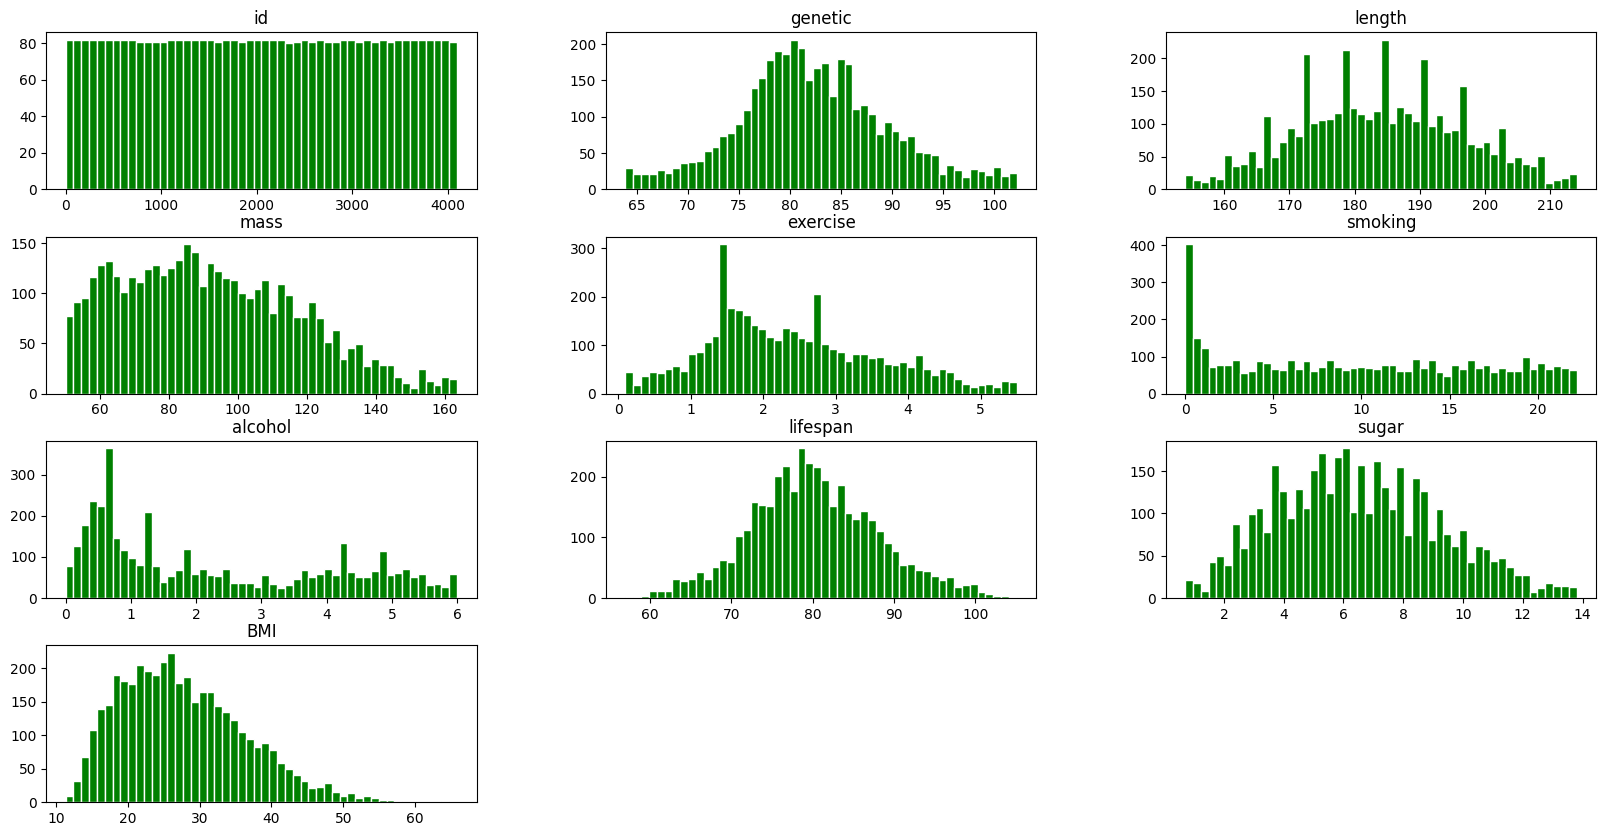

In [28]:
patient_DF_hist = patient_DF.hist( figsize=(20,10), grid = False, bins = 50, color = "green", ec = "white")

<H1><B>Outliers</B></H1>

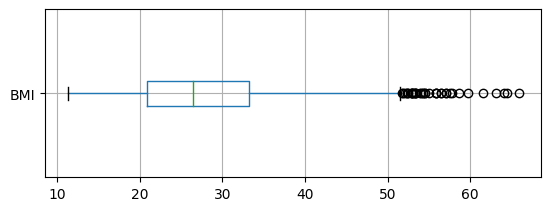

In [29]:
plt.subplot(2, 1, 1)
patient_DF2 = patient_DF.boxplot(['BMI'], vert = False)
plt.show()
# Q1=patient_DF.quantile(0.25)
# Q2=patient_DF.quantile(0.75)

<H1><B>Heatmap</B></H1>

<Axes: >

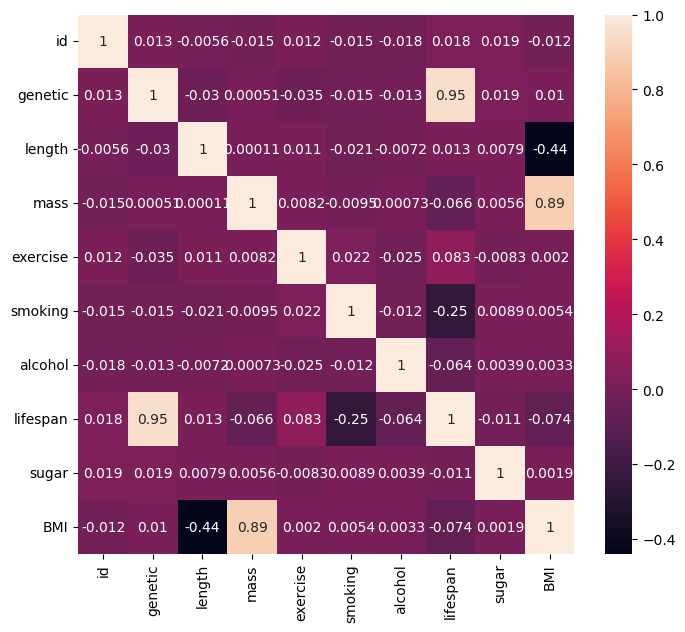

In [30]:
fig = plt.figure(figsize=(8,7))
sns.heatmap(patient_DF.corr(), annot = True)


# Scatter Plot 

<Axes: xlabel='BMI', ylabel='lifespan'>

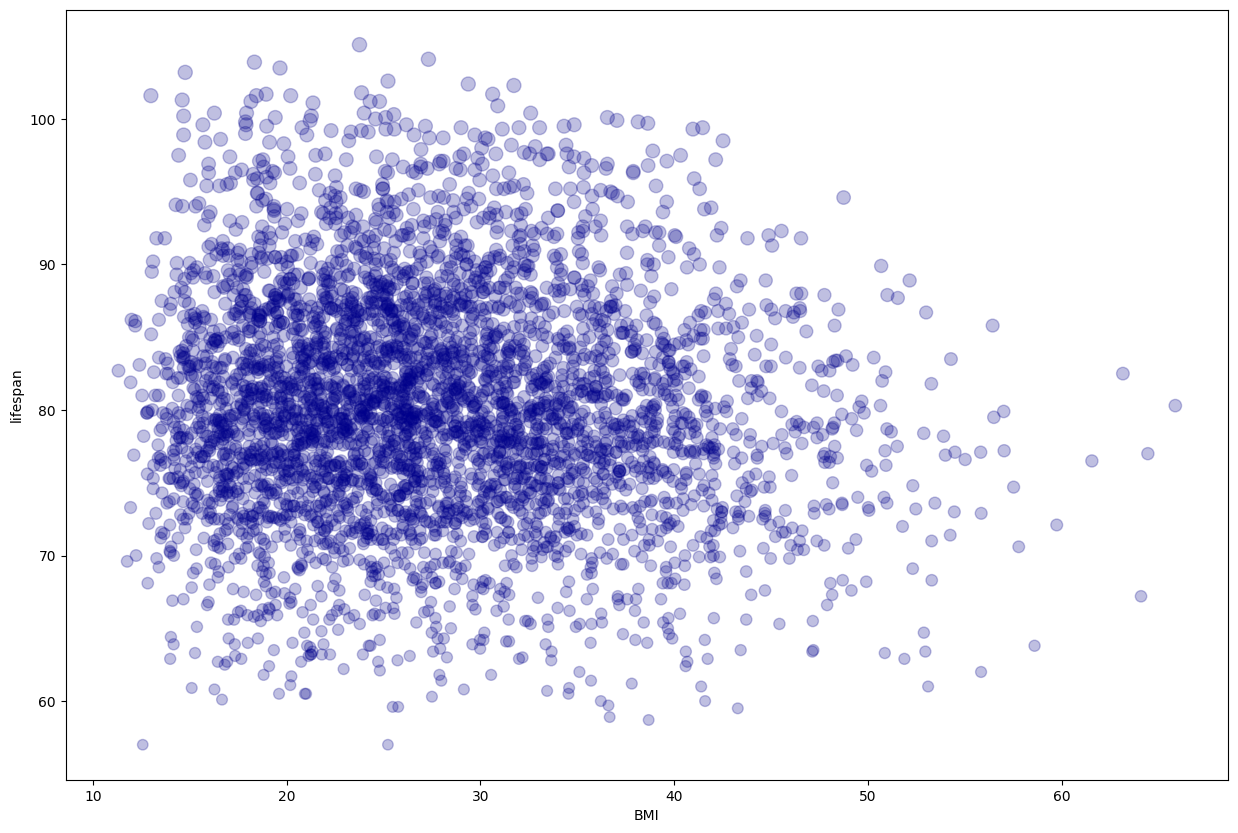

In [31]:
patient_DF.plot.scatter(x ='BMI', y= 'lifespan', s = 'lifespan' , c= 'darkblue',figsize= (15,10), alpha = 0.25)

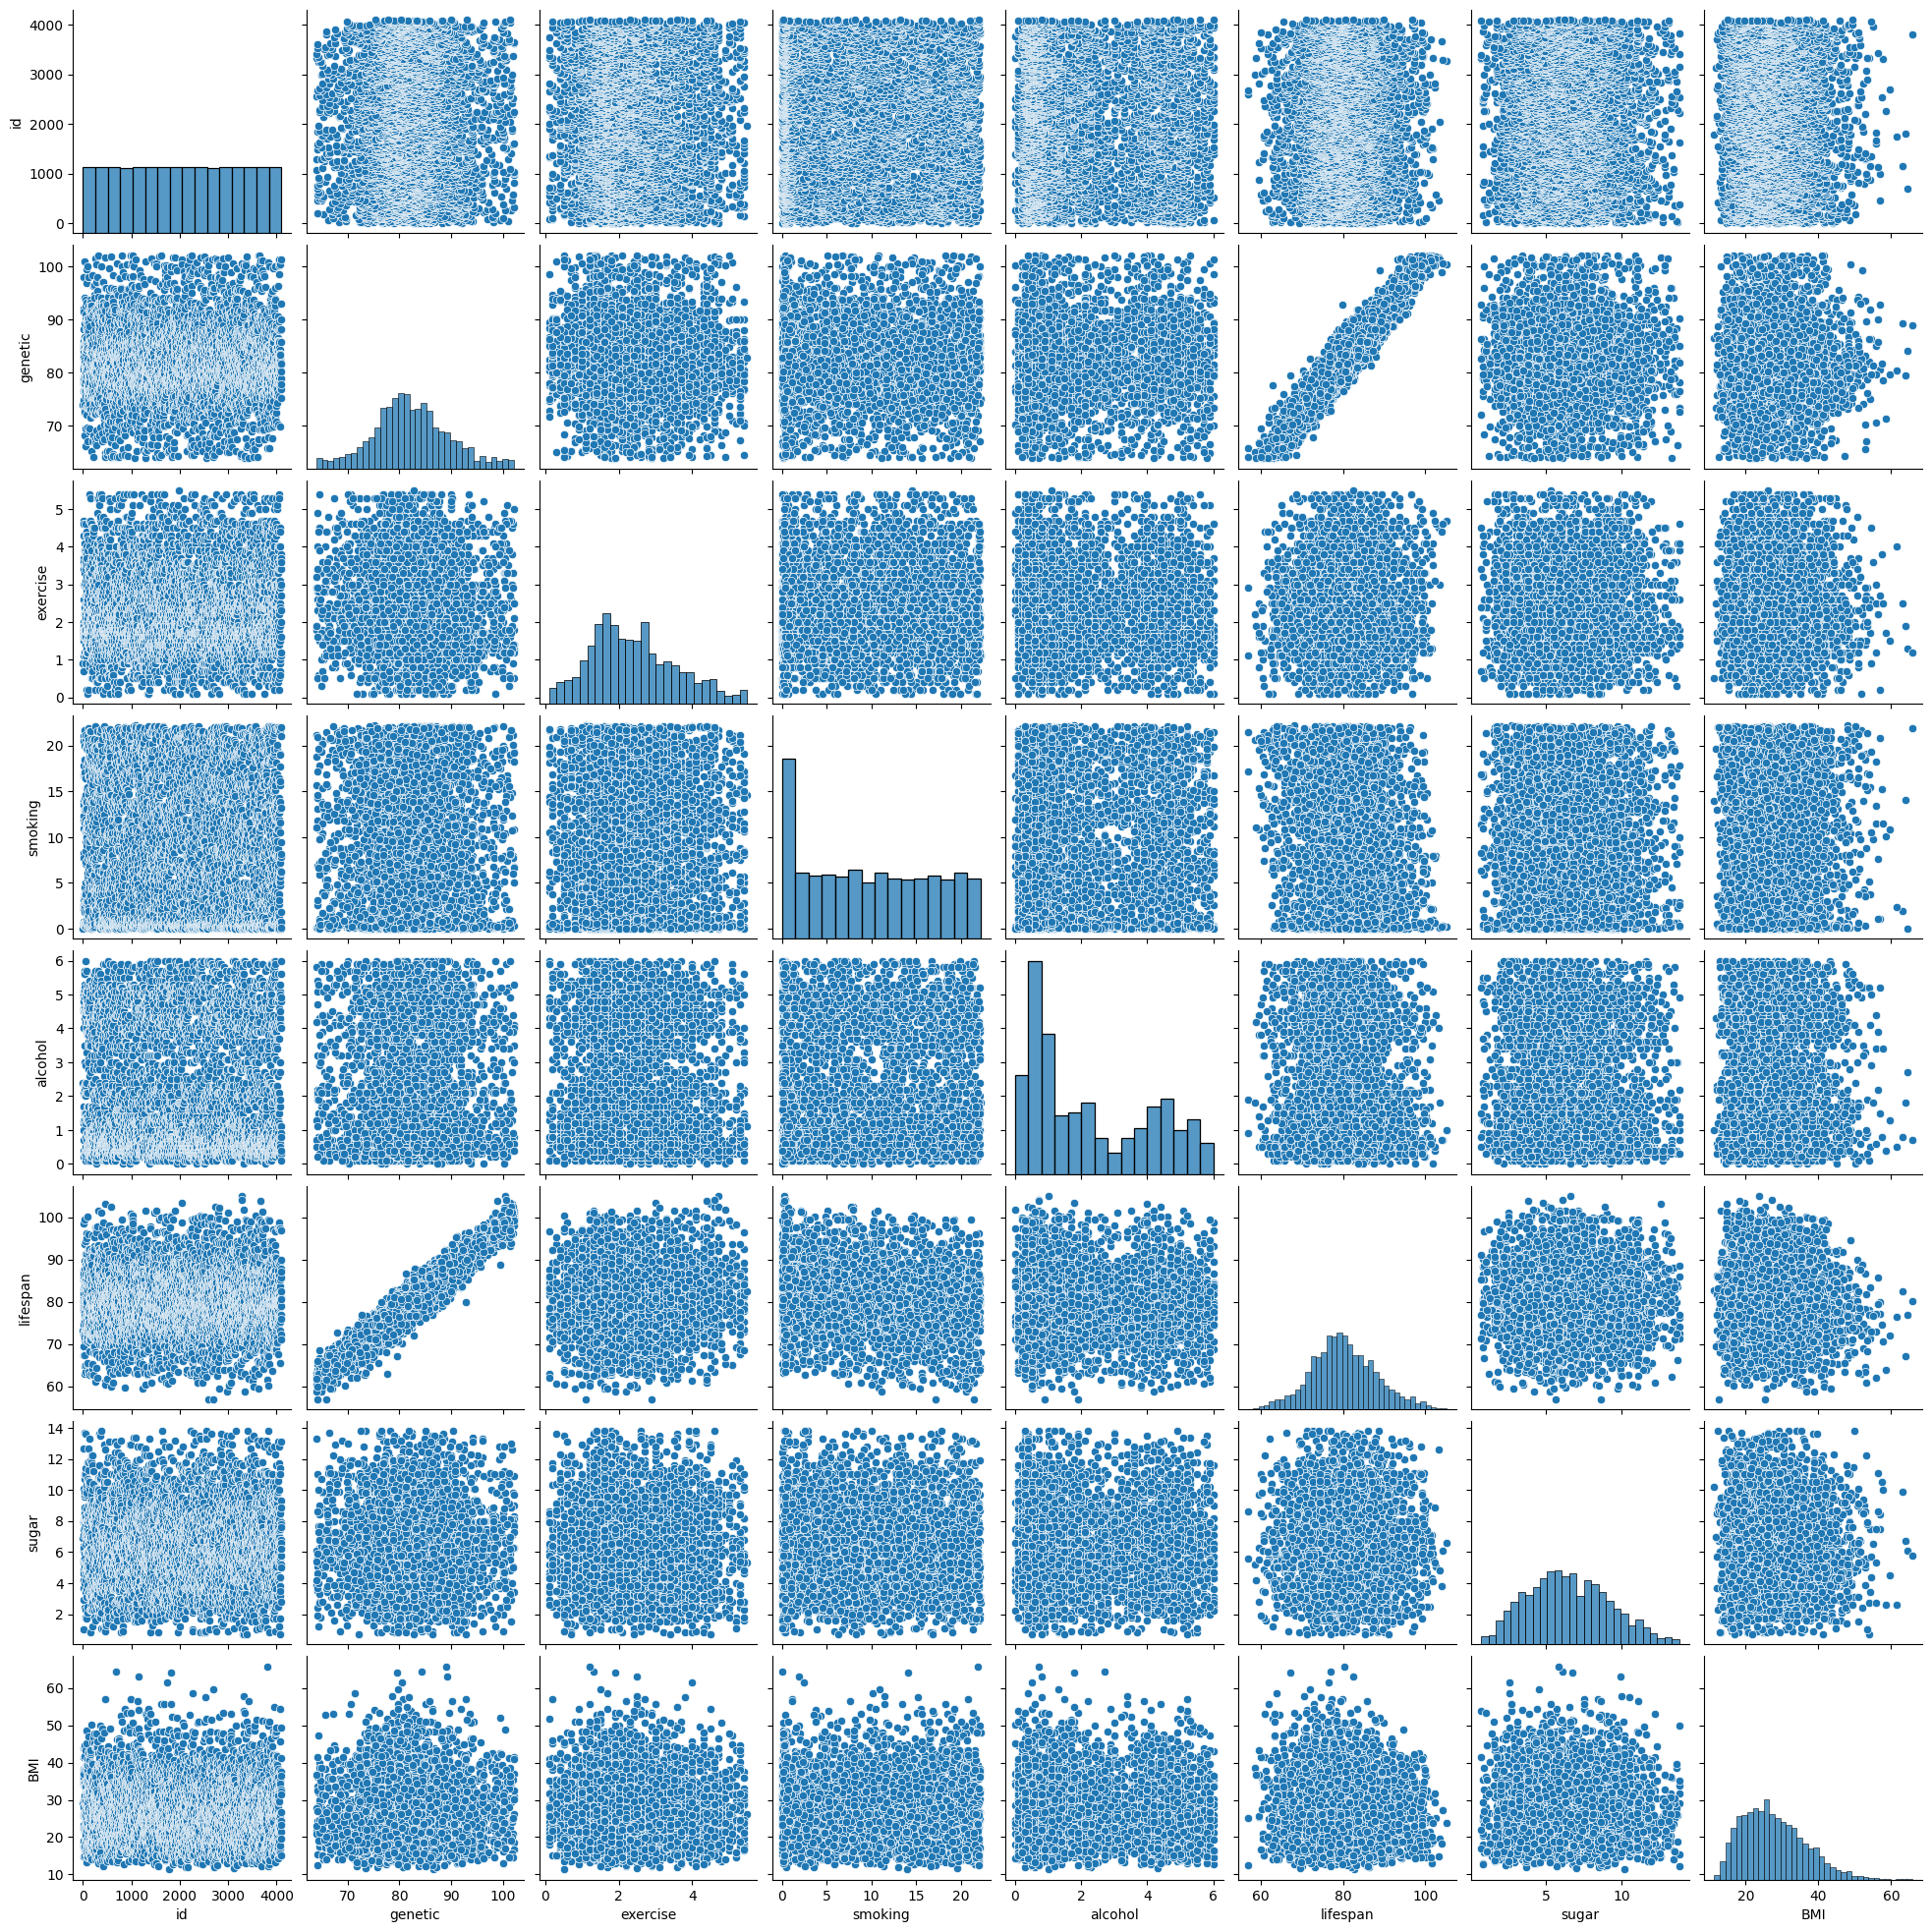

In [32]:
patient_DF2=patient_DF.drop(['length','mass'], axis=1)
sns.pairplot(patient_DF2)

<H1><B>SUMMARY and ASSUMPTIONS</B></H1>

<B>We believe this DataFrame is 'flawed'.</B> <br>We see this DataFrame deliveres too little correlation. In order to make this work we will assume an outcome to be true while we know the outcome will be flawed. We did create and programmed a new column 'BMI'. There is one clear correlation between 'lifespan' and 'genetic'. However there is no other clear correlation. However there is a correlation between 'exercise' and 'lifespan' and between 'alocohol' and 'lifespan'. Nevertheless their correlation-values in the Heatmap above appear to be under '0.1' and therefor could be considered as a 'trend'.

<B>We will be looking into two scenarios:</B> <br><B>1.</B> Modelling <B>AI</B> around 'lifespan' versus 'smoking'. <br><B>2.</B> Modelling <B>AI</B> around 'lifespan' versus 'sugar, alcohol and exercise'.

# Clustering using Groupby and Dendrogram

In [34]:
intervals = [ 10, 20, 25, 30, 40]
col = patient_DF2['BMI']
patient_DF2['BMI Groups'] = pd.cut(x=col, bins=intervals)
patient_DF2['BMI Groups']


0       (25.0, 30.0]
1       (30.0, 40.0]
2       (30.0, 40.0]
3                NaN
4       (20.0, 25.0]
            ...     
4079    (30.0, 40.0]
4080             NaN
4081    (30.0, 40.0]
4082    (30.0, 40.0]
4083    (30.0, 40.0]
Name: BMI Groups, Length: 4084, dtype: category
Categories (4, interval[int64, right]): [(10, 20] < (20, 25] < (25, 30] < (30, 40]]

In [35]:
patient_DF2.groupby('BMI Groups')['BMI Groups'].count()

BMI Groups
(10, 20]     860
(20, 25]     886
(25, 30]     851
(30, 40]    1109
Name: BMI Groups, dtype: int64

In [36]:
patient_DF2_oh = pd.get_dummies(patient_DF2)
 # Display the one-hot encoded dataframe
patient_DF2_oh 

id  genetic  exercise  smoking  alcohol  lifespan  sugar        BMI  \
0        1     73.9       0.9      0.0      2.4      73.1    6.9  29.130752   
1        2     86.0       1.8      8.1      0.4      85.0    4.2  35.627366   
2        3     83.3       1.1      0.8      4.6      81.6    7.5  35.963326   
3        4     82.8       4.7     11.8      1.0      81.0    2.9  41.418798   
4        5     78.7       1.5      8.3      4.9      75.0    5.5  22.598157   
...    ...      ...       ...      ...      ...       ...    ...        ...   
4079  4092     80.3       3.7      0.1      5.6      80.7    5.8  37.416064   
4080  4093     75.3       3.6      6.2      5.6      71.1    7.6  49.382716   
4081  4094     93.1       2.7      9.4      4.9      90.0    6.6  32.277932   
4082  4095     77.9       2.3     13.2      0.8      75.9    6.2  31.418685   
4083  4096    101.3       1.2      8.2      6.0      96.9    6.2  36.555002   

      BMI Groups_(10, 20]  BMI Groups_(20, 25]  BMI Groups_(25, 30]  \
0                       0                    0                    1   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    1                    0   
...                   ...                  ...                  ...   
4079                    0                    0                    0   
4080                    0                    0                    0   
4081                    0                    0                    0   
4082                    0                    0                    0   
4083                    0                    0                    0   

      BMI Groups_(30, 40]  
0                       0  
1                       1  
2                       1  
3                       0  
4                       0  
...                   ...  
4079                    1  
4080                    0  
4081                    1  
4082                    1  
4083                    1  

[4084 rows x 12 columns]

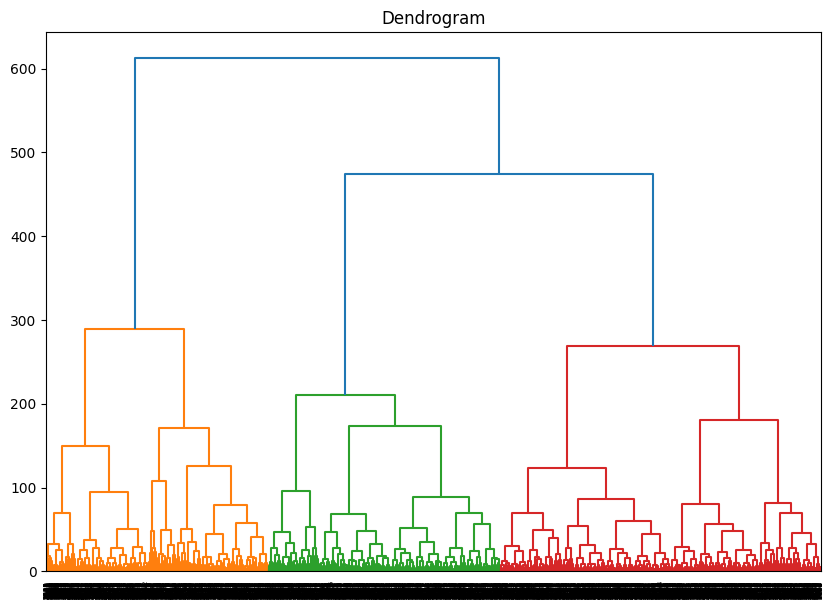

In [37]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")


selected_data =patient_DF2_oh.iloc[:, 5:8]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

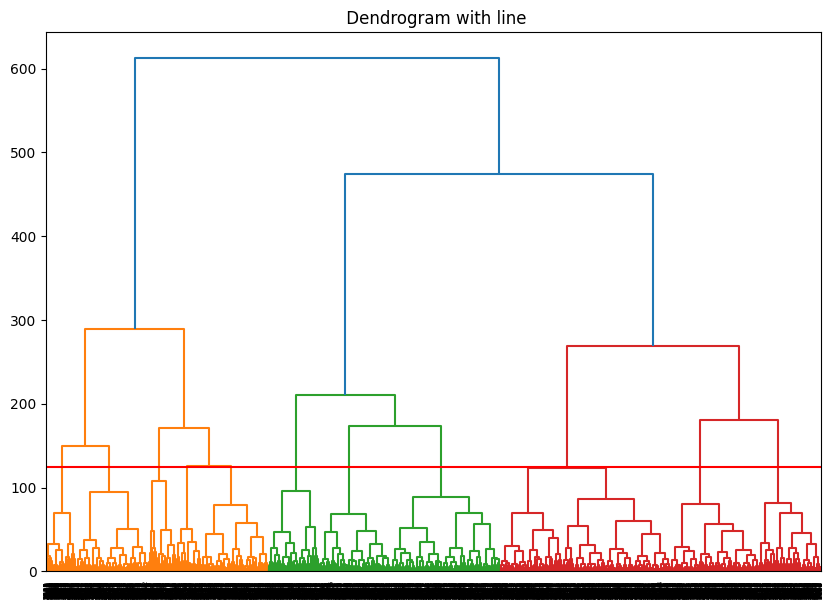

In [38]:
plt.figure(figsize=(10, 7))
plt.title(" Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')


In [39]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([0, 3, 3, ..., 3, 0, 3], dtype=int64)

Text(0.5, 1.0, 'Data')

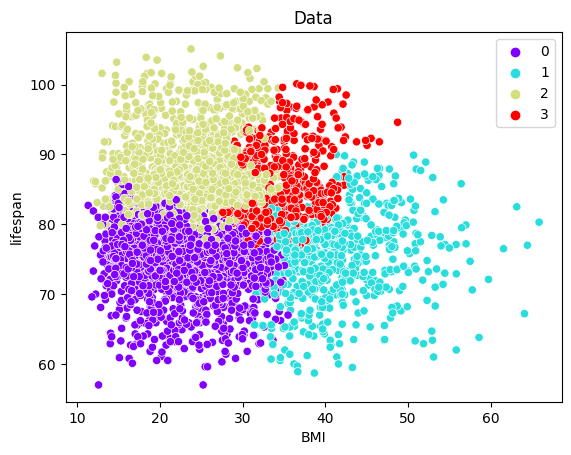

In [40]:
data_labels = clustering_model.labels_
sns.scatterplot(x='BMI',
                y='lifespan',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Data')

# Summary - OLS Regression

In [45]:
X = patient_DF2[ ['exercise','genetic','smoking','alcohol','sugar','BMI'] ].astype(float)
X = sm.add_constant(X)

y = patient_DF2[ "lifespan" ].astype(float)    # y is a series
# y = df.loc[:,"Life Expectancy"].astype(float)   # alternate code, same outcome

# Baseline results - model / fit / summarize, lots of bad Pvalue>0.05
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lifespan   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.401e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:11:35   Log-Likelihood:                -6173.8
No. Observations:                4084   AIC:                         1.236e+04
Df Residuals:                    4077   BIC:                         1.241e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4284      0.209      6.836      0.000       1.019       1.838
exercise       0.8040      0.015     54.692      0.000       0.775       0.833
genetic        1.0020      0.002    433.410      0.000       0.997       1.007
smoking       -0.2651      0.002   -106.677      0.000      -0.270      -0.260
alcohol       -0.2202      0.010    -23.063      0.000      -0.239      -0.201
sugar         -0.0733      0.006    -11.546      0.000      -0.086      -0.061
BMI           -0.0742      0.002    -37.598      0.000      -0.078      -0.070
==============================================================================
Omnibus:                      177.540   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.693
Skew:                          -0.110   Prob(JB):                    5.85e-121
Kurtosis:                       4.790   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""